<a href="https://colab.research.google.com/github/ming-shan-lu/mining-tenement-geojson/blob/main/MineTenementWA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas matplotlib shapely pyproj fiona --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 775.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.0 MB/s eta 0:00:00


In [14]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [16]:
# Use the raw GitHub URL
url = 'https://github.com/ming-shan-lu/mining-tenement-geojson/raw/refs/heads/main/Mining_Tenements_DMIRS_003_WA_GDA2020_Public.geojson'
gdf = gpd.read_file(url)

#  DATA EXPLORATION:

In [17]:
gdf.head()

,gid,tenid,type,survstatus,tenstatus,holdercnt,holder1,addr1,holder2,addr2,...,addr9,fmt_tenid,legal_area,unit_of_me,special_in,extract_da,grantdate,startdate,enddate,geometry
0,34663342,CML1200448,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/448,71.60,HA.,,2025-06-27 06:04:52+00:00,1952/02/28 00:00:01+00,1951-03-08 00:00:01+00:00,2026/06/30 00:00:00+00,"MULTIPOLYGON (((116.31024 -33.39057, 116.31176..."
1,34663343,CML1200449,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/449,129.45,HA.,,2025-06-27 06:05:26+00:00,1951/06/28 00:00:01+00,1951-03-08 00:00:01+00:00,2026/06/30 00:00:00+00,"MULTIPOLYGON (((116.2999 -33.42261, 116.30594 ..."
2,34663344,CML1200450,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/450,129.50,HA.,,2025-06-27 06:05:26+00:00,1951/06/28 00:00:01+00,1951-03-07 00:00:01+00:00,2026/06/30 00:00:00+00,"MULTIPOLYGON (((116.32327 -33.42598, 116.31637..."
3,34663345,CML1200451,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/451,129.50,HA.,,2025-06-27 06:05:26+00:00,1951/06/28 00:00:01+00,1951-03-07 00:00:01+00:00,2026/06/30 00:00:00+00,"MULTIPOLYGON (((116.33018 -33.4216, 116.32842 ..."
4,34663346,CML1200452,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/452,129.50,HA.,,2025-06-27 06:05:26+00:00,1951/06/28 00:00:01+00,1951-03-07 00:00:01+00:00,2026/06/30 00:00:00+00,"MULTIPOLYGON (((116.33708 -33.41723, 116.33182..."


In [18]:
gdf.info()
# 29882 rows, 33 cloumns, 'grantdate' & 'enddate' need to covert to datetime/date

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29882 entries, 0 to 29881
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   gid         29882 non-null  int32              
 1   tenid       29882 non-null  object             
 2   type        29882 non-null  object             
 3   survstatus  29882 non-null  object             
 4   tenstatus   29882 non-null  object             
 5   holdercnt   29882 non-null  float64            
 6   holder1     29882 non-null  object             
 7   addr1       29882 non-null  object             
 8   holder2     29882 non-null  object             
 9   addr2       29882 non-null  object             
 10  holder3     29882 non-null  object             
 11  addr3       29882 non-null  object             
 12  holder4     29882 non-null  object             
 13  addr4       29882 non-null  object             
 14  holder5     29882 non-null  ob

In [19]:
# Extract year as string and convert to number
gdf["grant_year_check"] = gdf["grantdate"].str[:4].astype("int", errors="ignore") # extract first 4 characters
gdf["grant_year_check"]


,grant_year_check
0,1952
1,1951
2,1951
3,1951
4,1951
...,...
29877,2999
29878,2999
29879,2999
29880,2011


In [20]:
# Check years beyond pandas limit (1700 - 2262)

gdf["grant_year_check"] = gdf["grantdate"].str[:4].astype("int", errors="ignore")
outbound_rows = gdf[(gdf["grant_year_check"] < 1700) | (gdf["grant_year_check"] > 2262)]
outbound_rows



,gid,tenid,type,survstatus,tenstatus,holdercnt,holder1,addr1,holder2,addr2,...,fmt_tenid,legal_area,unit_of_me,special_in,extract_da,grantdate,startdate,enddate,geometry,grant_year_check
104,34673867,E 0402332,EXPLORATION LICENCE,UNSURVEYED,PENDING,1.0,PLUTON RESOURCES LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,E 04/2332,19.0,BL.,,2025-06-27 06:05:27+00:00,2999/12/31 00:00:00+00,2013-07-25 00:00:00+00:00,2999/12/31 00:00:00+00,"MULTIPOLYGON (((124.41667 -16.48332, 124.40001...",2999
106,34673933,E 0402337,EXPLORATION LICENCE,UNSURVEYED,PENDING,1.0,PLUTON RESOURCES LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,E 04/2337-I,1.0,BL.,I,2025-06-27 06:05:27+00:00,2999/12/31 00:00:00+00,2013-09-06 00:00:00+00:00,2999/12/31 00:00:00+00,"MULTIPOLYGON (((123.50001 -16.04998, 123.51668...",2999
109,34674024,P 4502912,PROSPECTING LICENCE,UNSURVEYED,PENDING,1.0,HOLCIM (AUSTRALIA) PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",,,...,P 45/2912,144.0,HA.,,2025-06-27 06:06:24+00:00,2999/12/31 00:00:00+00,2013-11-08 00:00:00+00:00,2999/12/31 00:00:00+00,"MULTIPOLYGON (((118.43018 -20.43332, 118.44077...",2999
117,34674025,P 4502913,PROSPECTING LICENCE,UNSURVEYED,PENDING,1.0,HOLCIM (AUSTRALIA) PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",,,...,P 45/2913,180.0,HA.,,2025-06-27 06:06:24+00:00,2999/12/31 00:00:00+00,2013-11-08 00:00:00+00:00,2999/12/31 00:00:00+00,"MULTIPOLYGON (((118.44548 -20.44588, 118.45243...",2999
120,34674026,P 4502914,PROSPECTING LICENCE,UNSURVEYED,PENDING,1.0,HOLCIM (AUSTRALIA) PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",,,...,P 45/2914,175.0,HA.,,2025-06-27 06:06:24+00:00,2999/12/31 00:00:00+00,2013-11-08 00:00:00+00:00,2999/12/31 00:00:00+00,"MULTIPOLYGON (((118.47403 -20.45514, 118.47455...",2999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29874,34684418,EOS7000021,EXPLORATION LICENCE OFFSHORE,UNSURVEYED,PENDING,1.0,BONAPARTE AGGREGATES PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",,,...,WA-21-EOS,45.0,BL.,,2025-06-27 06:06:28+00:00,2999/12/31 00:00:00+00,2021-09-10 00:00:00+00:00,2999/12/31 00:00:00+00,"MULTIPOLYGON (((128.16668 -14.56665, 128.16668...",2999
29876,34684334,MEL7000040,COMMONWEALTH EXPLORATION LICENCE,UNSURVEYED,PENDING,2.0,QUATERNARY RESOURCES PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",WIDERANGE CORPORATION PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",...,WA-40-MEL,44.0,BL.,,2025-06-27 06:06:28+00:00,2999/12/31 00:00:00+00,2021-08-23 00:00:00+00:00,2999/12/31 00:00:00+00,"MULTIPOLYGON (((128.20001 -14.49999, 128.20001...",2999
29877,34684442,MEL7000041,COMMONWEALTH EXPLORATION LICENCE,UNSURVEYED,PENDING,1.0,BOSKALIS AUSTRALIA PTY LIMITED,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",,,...,WA-41-MEL,30.0,BL.,,2025-06-27 06:06:28+00:00,2999/12/31 00:00:00+00,2021-09-10 00:00:00+00:00,2999/12/31 00:00:00+00,"MULTIPOLYGON (((128.26668 -14.53332, 128.26668...",2999
29878,34684443,MEL7000042,COMMONWEALTH EXPLORATION LICENCE,UNSURVEYED,PENDING,1.0,BONAPARTE AGGREGATES PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",,,...,WA-42-MEL,44.0,BL.,,2025-06-27 06:06:28+00:00,2999/12/31 00:00:00+00,2021-09-10 00:00:00+00:00,2999/12/31 00:00:00+00,"MULTIPOLYGON (((128.20001 -14.49999, 128.20001...",2999


In [21]:
outbound_rows["grantdate"].unique()


array(['2999/12/31 00:00:00+00'], dtype=object)

In [22]:
(outbound_rows["grantdate"] == '2999/12/31 00:00:00+00').all()


np.True_

In [23]:
gdf["grant_year_check"].value_counts().sort_index()


,count
grant_year_check,
1945,1
1951,20
1952,2
1961,1
1962,3
...,...
2022,1514
2023,1361
2024,1367


In [24]:
#All the rows with 'grantdate' = 2999/12/31 are:
# tenstatus = 'PENDING', survstatus = 'UNSURVEYED'
# Have realistic startdate values (e.g., 2013–2021)
# Have the same enddate = 2999/12/31 — another placeholder, meaning "not granted, so no real expiry"

gdf[gdf["grantdate"] == "2999/12/31 00:00:00+00"][["tenid", "type", "grantdate", "startdate", "enddate", "survstatus","tenstatus"]]


,tenid,type,grantdate,startdate,enddate,survstatus,tenstatus
104,E 0402332,EXPLORATION LICENCE,2999/12/31 00:00:00+00,2013-07-25 00:00:00+00:00,2999/12/31 00:00:00+00,UNSURVEYED,PENDING
106,E 0402337,EXPLORATION LICENCE,2999/12/31 00:00:00+00,2013-09-06 00:00:00+00:00,2999/12/31 00:00:00+00,UNSURVEYED,PENDING
109,P 4502912,PROSPECTING LICENCE,2999/12/31 00:00:00+00,2013-11-08 00:00:00+00:00,2999/12/31 00:00:00+00,UNSURVEYED,PENDING
117,P 4502913,PROSPECTING LICENCE,2999/12/31 00:00:00+00,2013-11-08 00:00:00+00:00,2999/12/31 00:00:00+00,UNSURVEYED,PENDING
120,P 4502914,PROSPECTING LICENCE,2999/12/31 00:00:00+00,2013-11-08 00:00:00+00:00,2999/12/31 00:00:00+00,UNSURVEYED,PENDING
...,...,...,...,...,...,...,...
29874,EOS7000021,EXPLORATION LICENCE OFFSHORE,2999/12/31 00:00:00+00,2021-09-10 00:00:00+00:00,2999/12/31 00:00:00+00,UNSURVEYED,PENDING
29876,MEL7000040,COMMONWEALTH EXPLORATION LICENCE,2999/12/31 00:00:00+00,2021-08-23 00:00:00+00:00,2999/12/31 00:00:00+00,UNSURVEYED,PENDING
29877,MEL7000041,COMMONWEALTH EXPLORATION LICENCE,2999/12/31 00:00:00+00,2021-09-10 00:00:00+00:00,2999/12/31 00:00:00+00,UNSURVEYED,PENDING
29878,MEL7000042,COMMONWEALTH EXPLORATION LICENCE,2999/12/31 00:00:00+00,2021-09-10 00:00:00+00:00,2999/12/31 00:00:00+00,UNSURVEYED,PENDING


In [25]:
#All the rows with 'grantdate' = 2999/12/31 are:
# tenstatus = 'PENDING', survstatus = 'UNSURVEYED'
gdf[gdf["grantdate"] == "2999/12/31 00:00:00+00"]['survstatus'].unique() # ['tentatus']

array(['UNSURVEYED'], dtype=object)

In [26]:
# Replace both dates with NaT
mask_pending_2999 = gdf["grantdate"] == "2999/12/31 00:00:00+00"

mask_pending_2999 &= gdf["enddate"] == "2999/12/31 00:00:00+00"  # Both grantdate , enddate = "2999/12/31 00:00:00+00"

# Create new column to flag the NaT
gdf.loc[mask_pending_2999, "is_grant_pending"] = True

# Replaces the placebolder dates to NaT
gdf.loc[mask_pending_2999, ['grantdate','enddate']] = pd.NaT

In [27]:
gdf[gdf['is_grant_pending'] == True].head()

,gid,tenid,type,survstatus,tenstatus,holdercnt,holder1,addr1,holder2,addr2,...,legal_area,unit_of_me,special_in,extract_da,grantdate,startdate,enddate,geometry,grant_year_check,is_grant_pending
104,34673867,E 0402332,EXPLORATION LICENCE,UNSURVEYED,PENDING,1.0,PLUTON RESOURCES LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,19.0,BL.,,2025-06-27 06:05:27+00:00,NaT,2013-07-25 00:00:00+00:00,NaT,"MULTIPOLYGON (((124.41667 -16.48332, 124.40001...",2999,True
106,34673933,E 0402337,EXPLORATION LICENCE,UNSURVEYED,PENDING,1.0,PLUTON RESOURCES LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,1.0,BL.,I,2025-06-27 06:05:27+00:00,NaT,2013-09-06 00:00:00+00:00,NaT,"MULTIPOLYGON (((123.50001 -16.04998, 123.51668...",2999,True
109,34674024,P 4502912,PROSPECTING LICENCE,UNSURVEYED,PENDING,1.0,HOLCIM (AUSTRALIA) PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",,,...,144.0,HA.,,2025-06-27 06:06:24+00:00,NaT,2013-11-08 00:00:00+00:00,NaT,"MULTIPOLYGON (((118.43018 -20.43332, 118.44077...",2999,True
117,34674025,P 4502913,PROSPECTING LICENCE,UNSURVEYED,PENDING,1.0,HOLCIM (AUSTRALIA) PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",,,...,180.0,HA.,,2025-06-27 06:06:24+00:00,NaT,2013-11-08 00:00:00+00:00,NaT,"MULTIPOLYGON (((118.44548 -20.44588, 118.45243...",2999,True
120,34674026,P 4502914,PROSPECTING LICENCE,UNSURVEYED,PENDING,1.0,HOLCIM (AUSTRALIA) PTY LTD,"C/- AUSTWIDE MINING TITLE MANAGEMENT PTY LTD,P...",,,...,175.0,HA.,,2025-06-27 06:06:24+00:00,NaT,2013-11-08 00:00:00+00:00,NaT,"MULTIPOLYGON (((118.47403 -20.45514, 118.47455...",2999,True


In [28]:
# Convert 'grantdate', 'enddate' to datetime

gdf["grantdate"] = pd.to_datetime(gdf["grantdate"], errors="coerce")
gdf["enddate"] = pd.to_datetime(gdf["enddate"], errors="coerce")


In [29]:
# Column 'extract_da' = 2025-6-27, can be dropped.
date_only = gdf['extract_da'].dt.date

all_same_date = date_only.nunique() ==1

unique_dates = date_only.unique()
unique_dates

array([datetime.date(2025, 6, 27)], dtype=object)

## Check columns holder, address 2~9

In [30]:
# check non-empty counts in holder 2~9

holder_cols = [f"holder{i}" for i in range(2, 10)]

for col in holder_cols:
  non_empty = gdf[col].notna().sum() # includes empty strings
  non_blank = gdf[col].str.strip().replace("", pd.NA).dropna().nunique()
  print(f"{col}: {non_empty} non-NA rows, {non_blank} unique non_blank values")

holder2: 29882 non-NA rows, 581 unique non_blank values
holder3: 29882 non-NA rows, 96 unique non_blank values
holder4: 29882 non-NA rows, 30 unique non_blank values
holder5: 29882 non-NA rows, 10 unique non_blank values
holder6: 29882 non-NA rows, 1 unique non_blank values
holder7: 29882 non-NA rows, 1 unique non_blank values
holder8: 29882 non-NA rows, 1 unique non_blank values
holder9: 29882 non-NA rows, 1 unique non_blank values


In [31]:
# Check non-empty counts in addr2~9

addr_cols = [f"addr{i}" for i in range (2, 10)]

for col in addr_cols:
  non_empty = gdf[col].notna().sum()
  non_blank = gdf[col].str.strip().replace("", pd.NA).dropna().nunique()
  print(f"{col}: {non_empty} non-NA rows, {non_blank} unique non_blank values")

addr2: 29882 non-NA rows, 445 unique non_blank values
addr3: 29882 non-NA rows, 101 unique non_blank values
addr4: 29882 non-NA rows, 38 unique non_blank values
addr5: 29882 non-NA rows, 14 unique non_blank values
addr6: 29882 non-NA rows, 1 unique non_blank values
addr7: 29882 non-NA rows, 1 unique non_blank values
addr8: 29882 non-NA rows, 1 unique non_blank values
addr9: 29882 non-NA rows, 1 unique non_blank values


In [32]:
for col in ["holder6", "addr6", "holder7", "addr7", "holder8", "addr8", "holder9", "addr9"]:
    print(f"\n{col} unique non-blank values:")
    print(gdf[col].str.strip().replace("", pd.NA).dropna().unique())



holder6 unique non-blank values:
['DAVEY, JOHN WALTER']

addr6 unique non-blank values:
['C/O POST OFFICE,COOLGARDIE,WA,6429,AUSTRALIA']

holder7 unique non-blank values:
['DELIOS, ALEXANDROS']

addr7 unique non-blank values:
['5 THOMSON STREET,YORK,WA,6302,AUSTRALIA']

holder8 unique non-blank values:
['KERR, MONICA BERNADETTE']

addr8 unique non-blank values:
['PO BOX 2481,ESPERANCE,WA,6450,AUSTRALIA']

holder9 unique non-blank values:
['KERR, PAUL GERARD']

addr9 unique non-blank values:
['PO BOX 2481,ESPERANCE,WA,6450,AUSTRALIA']


In [33]:
mask = (
    (gdf["holder6"] == "DAVEY, JOHN WALTER") |
    (gdf["holder7"] == "DELIOS, ALEXANDROS") |
    (gdf["holder8"] == "KERR, MONICA BERNADETTE") |
    (gdf["holder9"] == "KERR, PAUL GERARD")
)

gdf[mask]


,gid,tenid,type,survstatus,tenstatus,holdercnt,holder1,addr1,holder2,addr2,...,legal_area,unit_of_me,special_in,extract_da,grantdate,startdate,enddate,geometry,grant_year_check,is_grant_pending
18368,34666705,M 1500229,MINING LEASE,SURVEYED,LIVE,9.0,"AINSWORTH, IAN ROGER","5 THOMSON STREEET,YORK,WA,6302,AUSTRALIA","BEHSMAN, PATRICIA MARY","11 MCKAY STREET,KALGOORLIE,WA,6430,AUSTRALIA",...,6.9535,HA.,,2025-06-27 06:06:02+00:00,1987-01-20 00:00:00+00:00,1986-10-28 00:00:00+00:00,2029-01-22 00:00:00+00:00,"MULTIPOLYGON (((121.22376 -30.87419, 121.22751...",1987,NaN


In [34]:
# Select holder/address columns
holder_cols = [f"holder{i}" for i in range(1, 10)]
addr_cols = [f"addr{i}" for i in range(1, 10)]

# Create a new dataframe with just the one row you're interested in
row = gdf.loc[18368]  # or use mask if you're not sure of index

# Create long format
records = []

for i in range(1, 10):
    holder = row[f"holder{i}"]
    addr = row[f"addr{i}"]
    if pd.notna(holder) and str(holder).strip() != "":
        records.append({
            "tenid": row["tenid"],
            "holder_num": i,
            "holder_name": holder,
            "holder_address": addr
        })

# Convert to DataFrame
holders_long_df = pd.DataFrame(records)
holders_long_df


,tenid,holder_num,holder_name,holder_address
0,M 1500229,1,"AINSWORTH, IAN ROGER","5 THOMSON STREEET,YORK,WA,6302,AUSTRALIA"
1,M 1500229,2,"BEHSMAN, PATRICIA MARY","11 MCKAY STREET,KALGOORLIE,WA,6430,AUSTRALIA"
2,M 1500229,3,BRAVOUR PTY LTD,"9 CHUDLEIGH STREET,FREMANTLE,WA,6160,AUSTRALIA"
3,M 1500229,4,BROADARROW GOLDMINES PTY LTD,"87 RODOREDA CRESCENT,RAVENSWOOD,WA,6208,AUSTRALIA"
4,M 1500229,5,CHIRON EXPLORATION PTY LTD,"125A WILDING STREET,DOUBLEVIEW,WA,6018,AUSTRALIA"
5,M 1500229,6,"DAVEY, JOHN WALTER","C/O POST OFFICE,COOLGARDIE,WA,6429,AUSTRALIA"
6,M 1500229,7,"DELIOS, ALEXANDROS","5 THOMSON STREET,YORK,WA,6302,AUSTRALIA"
7,M 1500229,8,"KERR, MONICA BERNADETTE","PO BOX 2481,ESPERANCE,WA,6450,AUSTRALIA"
8,M 1500229,9,"KERR, PAUL GERARD","PO BOX 2481,ESPERANCE,WA,6450,AUSTRALIA"


In [35]:
# check Null Value

gdf.isna().sum().sort_values(ascending=False)

,0
is_grant_pending,23387
enddate,6710
grantdate,6495
type,0
tenid,0
gid,0
survstatus,0
addr1,0
tenstatus,0
holdercnt,0


In [36]:
# Check duplicated rows

gdf.duplicated().sum()

np.int64(0)

##  Create new table: tenement_holder.csv

In [37]:
# Step 1: Create lists of holder and address columns
holder_cols = [f'holder{i}' for i in range(1,10)]
addr_cols = [f'addr{i}' for i in range(1, 10)]

# Step 2: Initialise a list to store holder records
holder_records = []

# Step 3: Loop through each row in gdf
for _, row in gdf.iterrows():
  tenid = row['tenid']
  for i in range(1,10):
    holder = row[f'holder{i}']
    address = row[f'addr{i}']
    if pd.notna(holder) and str(holder).strip() !='':  # Keep only non-empty values
      holder_records.append({
          'tenid': tenid,
          'holder_number': i,
          'holder_name': holder.strip(),
          'holder_address': address.strip() if pd.notna(address) else ''
      })

# Step 4: Covert to DataFrame
holder_df = pd.DataFrame(holder_records)


In [38]:
holder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34818 entries, 0 to 34817
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tenid           34818 non-null  object
 1   holder_number   34818 non-null  int64 
 2   holder_name     34818 non-null  object
 3   holder_address  34818 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [39]:
holder_df['holder_name'].value_counts()

,count
holder_name,
BHP MINERALS PTY LTD,614
ITOCHU MINERALS & ENERGY OF AUSTRALIA PTY LTD,572
FMG PILBARA PTY LTD,465
NORTHERN STAR (SARACEN KALGOORLIE) PTY LTD,332
NORTHERN STAR (KLV) PTY LTD,332
...,...
"BARTLETT, DION THOMAS",1
"DALY, DAVID JAMES",1
"BRUN, SANDRA CLAUDIA",1


In [40]:

holder_df.groupby('holder_name')['tenid'].count().sort_values(ascending=False)

,tenid
holder_name,
BHP MINERALS PTY LTD,614
ITOCHU MINERALS & ENERGY OF AUSTRALIA PTY LTD,572
FMG PILBARA PTY LTD,465
NORTHERN STAR (SARACEN KALGOORLIE) PTY LTD,332
NORTHERN STAR (KLV) PTY LTD,332
...,...
YUKON RESOURCES PTY LTD,1
"ZABIELA, JOSEPH VICTOR",1
"ZADOW, ALLAN ROY",1


# Create Table 2: tenement_holders

In [41]:
# Save new table to csv

holder_df.to_csv('tenement_holders.csv', index = False)

## Drop irrilevent columns

In [42]:
gdf.drop(columns = ['extract_da', 'fmt_tenid'], inplace= True)

In [43]:
holder_cols = [f'holder{i}' for i in range(1,10)]
addr_cols = [f'addr{i}' for i in range(1,10)]

gdf.drop(columns = holder_cols + addr_cols, inplace=True)

In [44]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29882 entries, 0 to 29881
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   gid               29882 non-null  int32              
 1   tenid             29882 non-null  object             
 2   type              29882 non-null  object             
 3   survstatus        29882 non-null  object             
 4   tenstatus         29882 non-null  object             
 5   holdercnt         29882 non-null  float64            
 6   legal_area        29882 non-null  float64            
 7   unit_of_me        29882 non-null  object             
 8   special_in        29882 non-null  object             
 9   grantdate         23387 non-null  datetime64[ns, UTC]
 10  startdate         29882 non-null  datetime64[ms, UTC]
 11  enddate           23172 non-null  datetime64[ns, UTC]
 12  geometry          29882 non-null  geometry          

# Columns exploration

## Standarised categorical columns check

In [45]:
gdf['type'].unique()

array(['COAL MINING LEASE', 'EXPLORATION LICENCE', 'PROSPECTING LICENCE',
       'MINING LEASE', 'GENERAL PURPOSE LEASE', 'MISCELLANEOUS LICENCE',
       'CHRISTMAS ISLAND EXPLORATION LICENCE',
       'GENERAL PURPOSE LEASE S.A.',
       'CHRISTMAS ISLAND GENERAL PURPOSE LEASE',
       'MISCELLANEOUS LICENSE S.A.', 'MINERAL LEASE',
       'CHRISTMAS ISLAND MISCELLANEOUS LICENCE',
       'LICENCE TO TREAT TAILINGS', 'MINING LEASE S.A.',
       'TEMPORARY RESERVE', 'RETENTION LICENCE', 'MINERAL CLAIM',
       'CHRISTMAS ISLAND MINING LEASE', 'MINERAL LEASE S.A.',
       'EXPLORATION LICENCE OFFSHORE', 'COMMONWEALTH EXPLORATION LICENCE'],
      dtype=object)

In [46]:
gdf['type'].value_counts(dropna=False)


,count
type,
EXPLORATION LICENCE,10173
MINING LEASE,6836
PROSPECTING LICENCE,6684
MISCELLANEOUS LICENCE,4504
GENERAL PURPOSE LEASE,1169
MINERAL CLAIM,186
RETENTION LICENCE,81
MINERAL LEASE,75
COAL MINING LEASE,72


In [ ]:
gdf['survstatus'].unique()

array(['SURVEYED', 'UNSURVEYED'], dtype=object)

In [ ]:
gdf['survstatus'].value_counts(dropna=False)

,count
survstatus,
UNSURVEYED,22995
SURVEYED,6887


In [ ]:
gdf['tenstatus'].unique()

array(['LIVE', 'PENDING'], dtype=object)

In [ ]:
gdf['tenstatus'].value_counts(dropna=False)

,count
tenstatus,
LIVE,23387
PENDING,6495


In [ ]:
gdf['holdercnt'].unique()

array([1., 3., 2., 5., 4., 9.])

In [ ]:
gdf['holdercnt'].value_counts(dropna=False)

,count
holdercnt,
1.0,26420
2.0,2461
3.0,729
5.0,196
4.0,75
9.0,1


In [ ]:
gdf['unit_of_me'].unique()

array(['HA.', 'BL.', 'KM2'], dtype=object)

In [ ]:
gdf['unit_of_me'].value_counts()

,count
unit_of_me,
HA.,19697
BL.,10147
KM2,38


In [ ]:
gdf['special_in'].unique()


array([' ', 'I', 'S', 'G', 'B'], dtype=object)

In [47]:
gdf['special_in'].value_counts()

,count
special_in,
,28084
I,1350
S,426
G,17
B,5


# Add longitude and latitude to the dataframe

In [49]:
# Step 1: Save a copy in WGS84 (EPSG:4326) for later export
gdf_wgs84 = gdf.to_crs(epsg=4326)

# Step 2: Project to a meter-based CRS for accurate centroid calculation (e.g., GDA94 / MGA Zone 50: EPSG:28350)
gdf_projected = gdf.to_crs(epsg=28350)

# Step 3: Calculate centroids in projected CRS
gdf_projected["centroid"] = gdf_projected.geometry.centroid

# Step 4: Convert centroids back to WGS84
gdf_projected = gdf_projected.set_geometry("centroid")
gdf_centroids = gdf_projected.to_crs(epsg=4326)

# Step 5: Extract longitude and latitude from centroid
gdf_wgs84["longitude"] = gdf_centroids.geometry.x
gdf_wgs84["latitude"] = gdf_centroids.geometry.y


In [50]:
gdf_wgs84.head()

,gid,tenid,type,survstatus,tenstatus,holdercnt,legal_area,unit_of_me,special_in,grantdate,startdate,enddate,geometry,grant_year_check,is_grant_pending,longitude,latitude
0,34663342,CML1200448,COAL MINING LEASE,SURVEYED,LIVE,1.0,71.60,HA.,,1952-02-28 00:00:01+00:00,1951-03-08 00:00:01+00:00,2026-06-30 00:00:00+00:00,"MULTIPOLYGON (((116.31024 -33.39057, 116.31176...",1952,NaN,116.314387,-33.395339
1,34663343,CML1200449,COAL MINING LEASE,SURVEYED,LIVE,1.0,129.45,HA.,,1951-06-28 00:00:01+00:00,1951-03-08 00:00:01+00:00,2026-06-30 00:00:00+00:00,"MULTIPOLYGON (((116.2999 -33.42261, 116.30594 ...",1951,NaN,116.307696,-33.426770
2,34663344,CML1200450,COAL MINING LEASE,SURVEYED,LIVE,1.0,129.50,HA.,,1951-06-28 00:00:01+00:00,1951-03-07 00:00:01+00:00,2026-06-30 00:00:00+00:00,"MULTIPOLYGON (((116.32327 -33.42598, 116.31637...",1951,NaN,116.314598,-33.422393
3,34663345,CML1200451,COAL MINING LEASE,SURVEYED,LIVE,1.0,129.50,HA.,,1951-06-28 00:00:01+00:00,1951-03-07 00:00:01+00:00,2026-06-30 00:00:00+00:00,"MULTIPOLYGON (((116.33018 -33.4216, 116.32842 ...",1951,NaN,116.321499,-33.418017
4,34663346,CML1200452,COAL MINING LEASE,SURVEYED,LIVE,1.0,129.50,HA.,,1951-06-28 00:00:01+00:00,1951-03-07 00:00:01+00:00,2026-06-30 00:00:00+00:00,"MULTIPOLYGON (((116.33708 -33.41723, 116.33182...",1951,NaN,116.328400,-33.413642


In [51]:
gdf_wgs84.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29882 entries, 0 to 29881
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   gid               29882 non-null  int32              
 1   tenid             29882 non-null  object             
 2   type              29882 non-null  object             
 3   survstatus        29882 non-null  object             
 4   tenstatus         29882 non-null  object             
 5   holdercnt         29882 non-null  float64            
 6   legal_area        29882 non-null  float64            
 7   unit_of_me        29882 non-null  object             
 8   special_in        29882 non-null  object             
 9   grantdate         23387 non-null  datetime64[ns, UTC]
 10  startdate         29882 non-null  datetime64[ms, UTC]
 11  enddate           23172 non-null  datetime64[ns, UTC]
 12  geometry          29882 non-null  geometry          

# Create Table 1 : tenement_wa

In [57]:
gdf_wgs84.drop(columns= 'geometry', inplace= True)

In [59]:
# Save new table to csv

gdf_wgs84.to_csv('tenement_wa.csv', index = False)

# Geometry

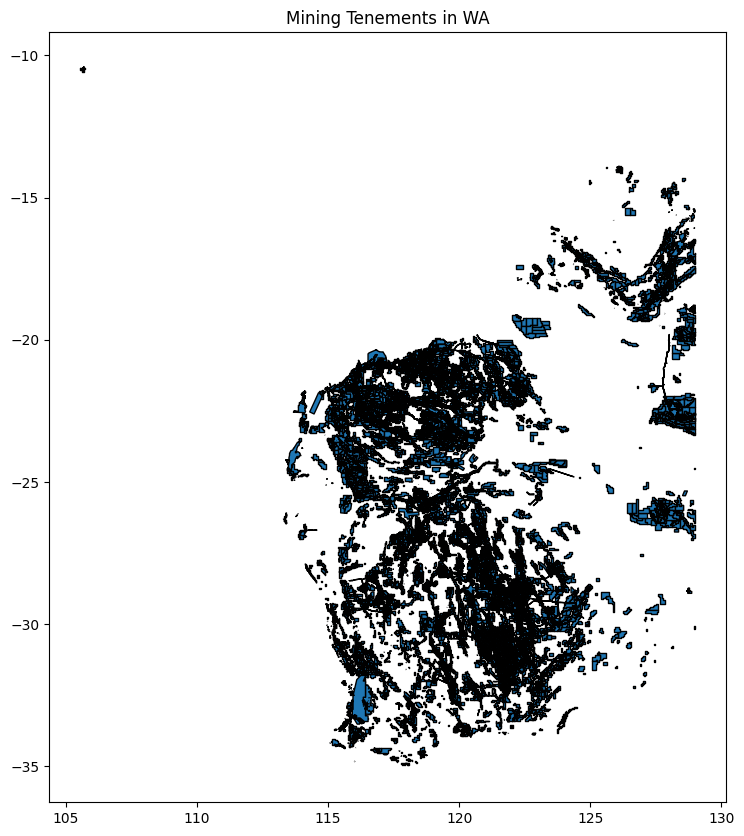

In [ ]:
import matplotlib.pyplot as plt

gdf.plot(figsize=(10, 10), edgecolor='black')
plt.title("Mining Tenements in WA")
plt.show()


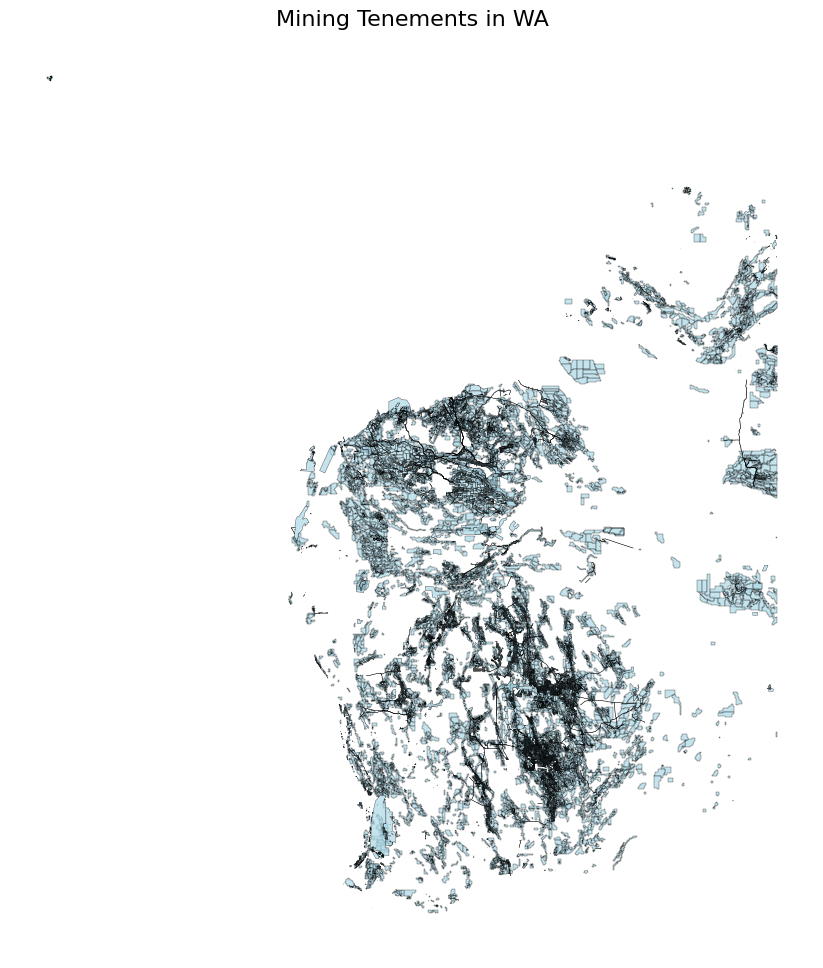

In [ ]:
gdf.plot(
    figsize=(12, 12),
    color='lightblue',        # fill color
    edgecolor='black',        # boundary color
    linewidth=0.3,            # thinner boundary
    alpha=0.7                 # slightly transparent
)
plt.title("Mining Tenements in WA", fontsize=16)
plt.axis("off")
plt.show()


<Axes: >

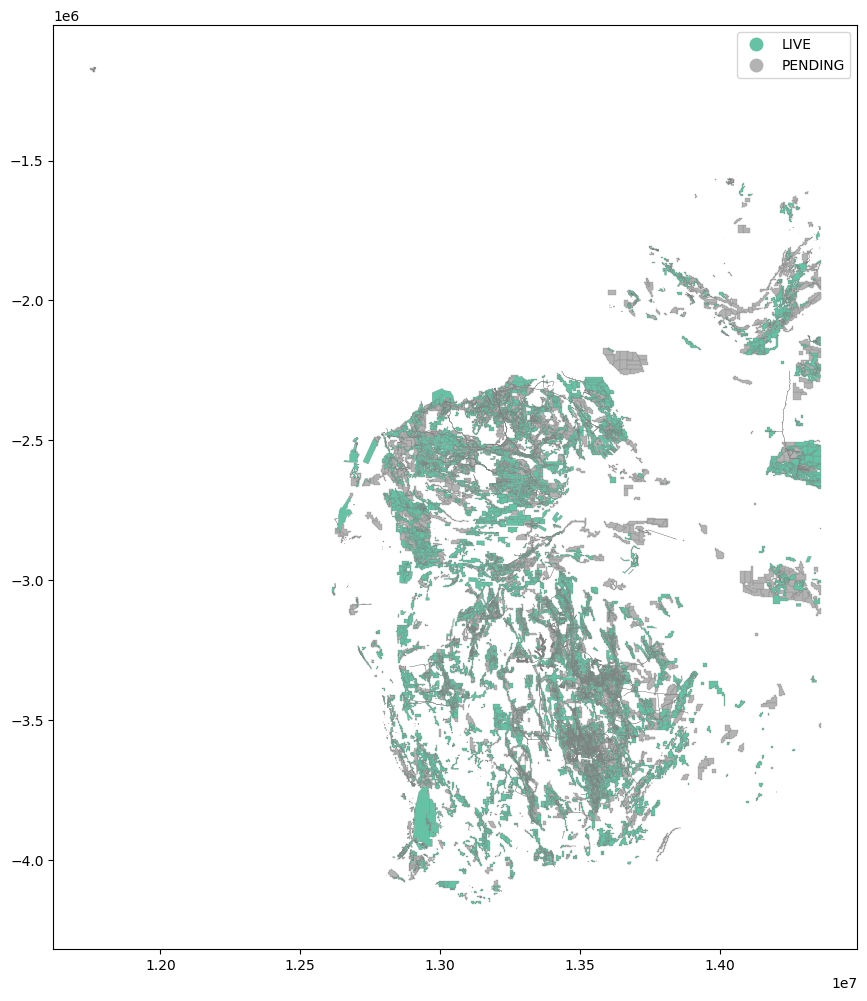

In [ ]:
gdf.plot(
    column='tenstatus',
    figsize=(12, 12),
    legend=True,
    cmap='Set2',
    edgecolor='grey',
    linewidth=0.2
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 99.9 MB/s eta 0:00:00


(np.float64(11617295.711843295),
 np.float64(14490986.201101996),
 np.float64(-4318564.163980788),
 np.float64(-1015739.8854405684))

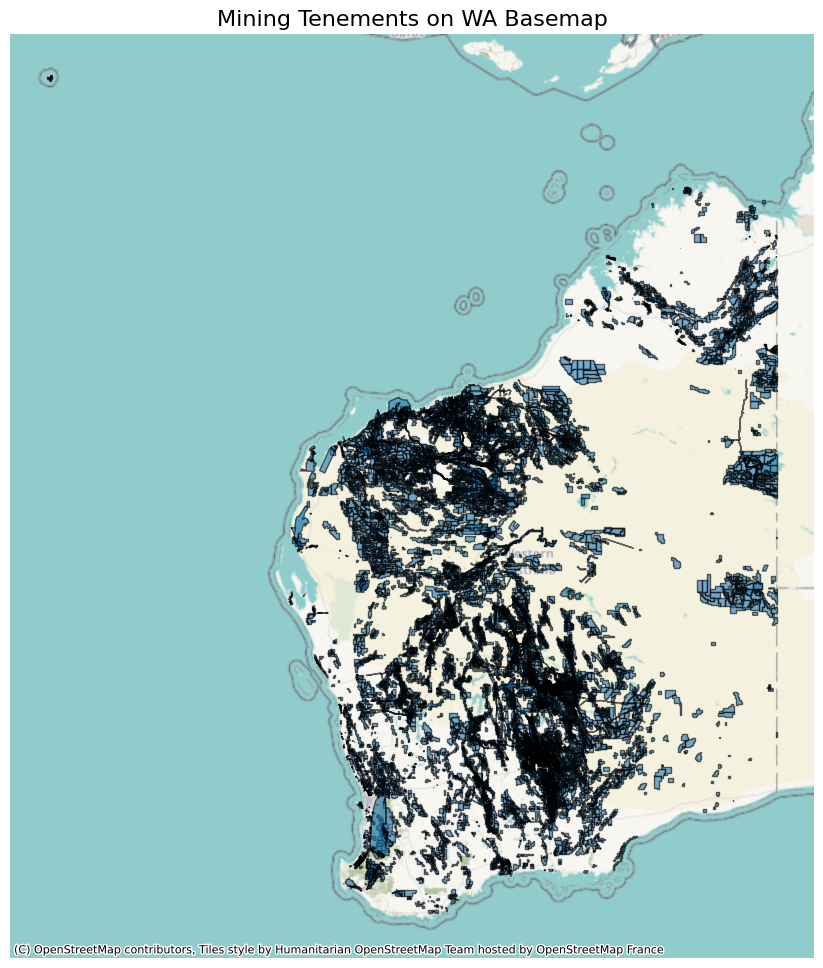

In [ ]:
!pip install contextily

import contextily as ctx

ax = gdf.to_crs(epsg=3857).plot(
    figsize=(12, 12),
    alpha=0.6,
    edgecolor='black'
)
ctx.add_basemap(ax, crs=gdf.crs.to_string())
plt.title("Mining Tenements on WA Basemap", fontsize=16)
plt.axis("off")

In [ ]:
gdf.geom_type.value_counts()


,count
MultiPolygon,29882


In [ ]:
gdf = gdf.to_crs(epsg=3857)
gdf["centroid"] = gdf.geometry.centroid
gdf["longitude"] = gdf["centroid"].x
gdf["latitude"] = gdf["centroid"].y


NameError: name 'gdf' is not defined

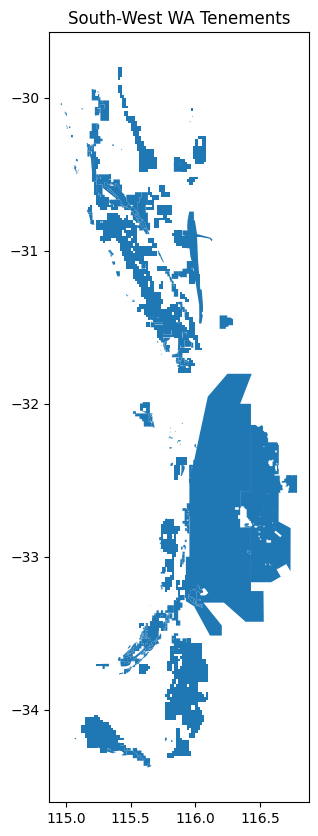

In [ ]:
# Example: zoom in to south-west WA
gdf.cx[113:116, -35:-30].plot(figsize=(10, 10))
plt.title("South-West WA Tenements")
plt.show()


# Regions WA

In [11]:
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Raw GitHub URL
url = 'https://github.com/ming-shan-lu/mining-tenement-geojson/raw/refs/heads/main/Regional_Development_Commissions_Regions_DPIRD_020_WA_GDA2020_Public.geojson'
regions = gpd.read_file(url)

In [54]:
regions.crs


<Geographic 2D CRS: EPSG:7844>
Name: GDA2020
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Island, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.55, 173.34, -8.47)
Datum: Geocentric Datum of Australia 2020
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [52]:
regions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   region               9 non-null      object  
 1   link                 9 non-null      object  
 2   st_area_shape_       9 non-null      float64 
 3   st_perimeter_shape_  9 non-null      float64 
 4   geometry             9 non-null      geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 492.0+ bytes


In [53]:
regions["region"].unique()


array(['Great Southern', 'Pilbara', 'South West', 'Kimberley',
       'Wheatbelt', 'Peel', 'Gascoyne', 'Goldfields-Esperance',
       'Mid West'], dtype=object)

# Create table 3: region

In [55]:
# Do the spatial join
gdf_with_regions = gpd.sjoin(gdf_wgs84, regions[["region", "geometry"]], how="left", predicate="intersects")

# Create your simple table with just what you need
simple_table = gdf_with_regions[['tenid', 'region', 'longitude', 'latitude']].copy()

# Export it
simple_table.to_csv("tenement_regions_simple.csv", index=False)

print(f"Simple table created: {len(simple_table)} rows")
print(f"Columns: {list(simple_table.columns)}")


/tmp/ipython-input-55-3386768899.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:7844

  gdf_with_regions = gpd.sjoin(gdf_wgs84, regions[["region", "geometry"]], how="left", predicate="intersects")


Simple table created: 30171 rows
Columns: ['tenid', 'region', 'longitude', 'latitude']


<Axes: >

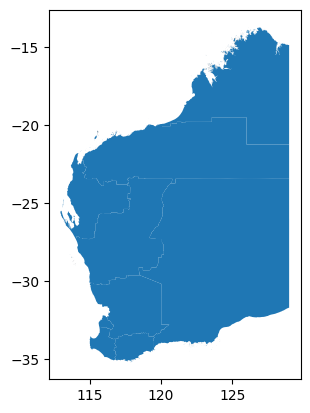

In [9]:
regions.plot()

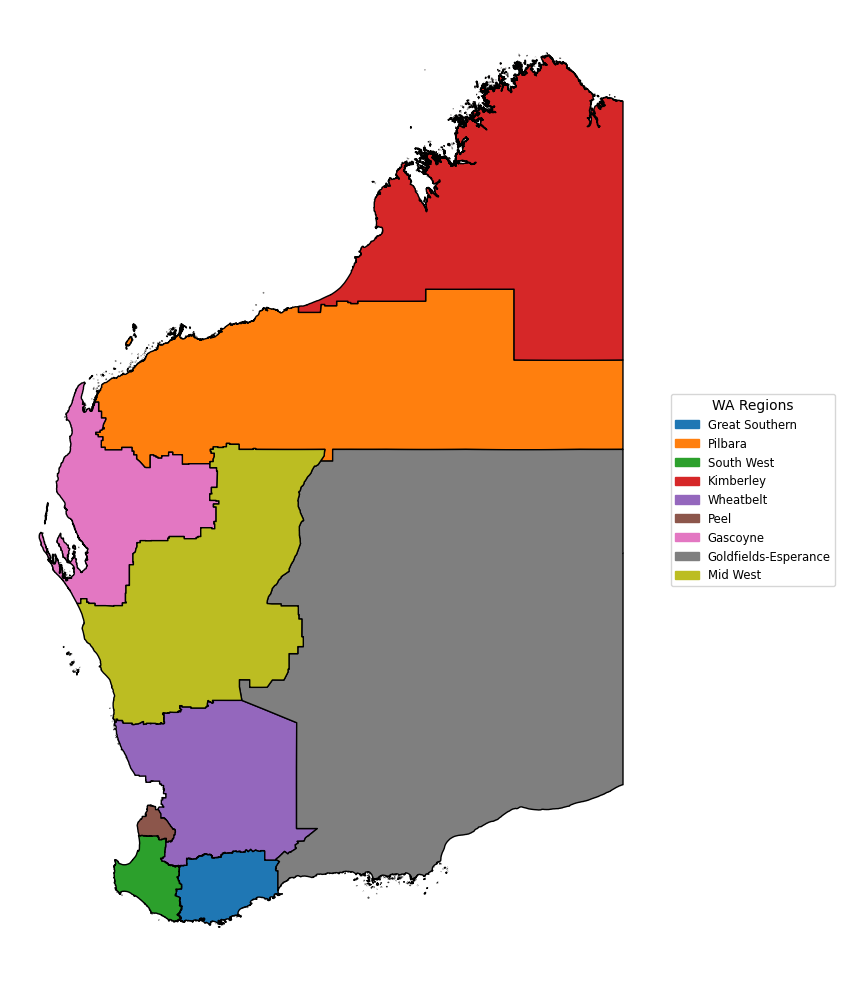

In [ ]:
import matplotlib.patches as mpatches

# Assign a color to each region
unique_regions = regions["region"].unique()
colors = plt.get_cmap("tab10")(range(len(unique_regions)))  # up to 10 regions

# Create a color map dict
color_dict = dict(zip(unique_regions, colors))

# Plot each region with its assigned color
fig, ax = plt.subplots(figsize=(8, 10))
for region in unique_regions:
    regions[regions["region"] == region].plot(ax=ax, color=color_dict[region], edgecolor="black")

# Create legend manually
patches = [mpatches.Patch(color=color_dict[region], label=region) for region in unique_regions]
ax.legend(handles=patches, title="WA Regions", loc="center left", bbox_to_anchor=(1.02, 0.5),
          fontsize="small", title_fontsize="medium", frameon=True)

plt.axis("off")
plt.tight_layout()
plt.show()


